<a href="https://colab.research.google.com/github/Gobihanath/DTect/blob/main/Extraction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


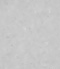

Signature 2311 - Width: 10, Height: 10, Area: 1775.5


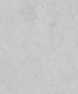

Signature 5848 - Width: 10, Height: 10, Area: 1899.5


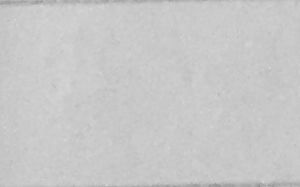

Signature 5878 - Width: 10, Height: 10, Area: 25024.5


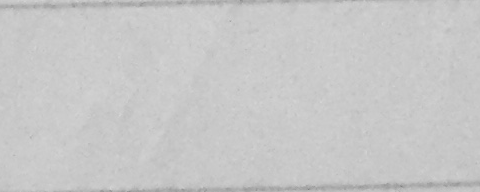

Signature 5997 - Width: 10, Height: 10, Area: 51032.5


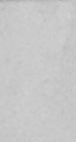

Signature 6059 - Width: 10, Height: 10, Area: 5021.5


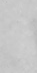

Signature 10780 - Width: 10, Height: 10, Area: 1186.0


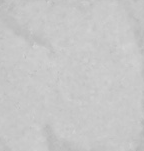

Signature 12257 - Width: 10, Height: 10, Area: 11869.5


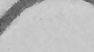

Signature 15106 - Width: 10, Height: 10, Area: 1331.5


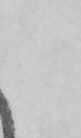

Signature 16493 - Width: 10, Height: 10, Area: 4560.0


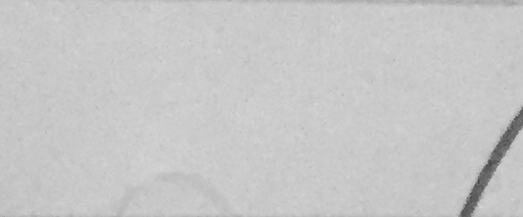

Signature 16715 - Width: 10, Height: 10, Area: 69622.0


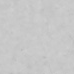

Signature 18366 - Width: 10, Height: 10, Area: 1624.0


Signature 20511 - Width: 10, Height: 10, Area: 2130.5


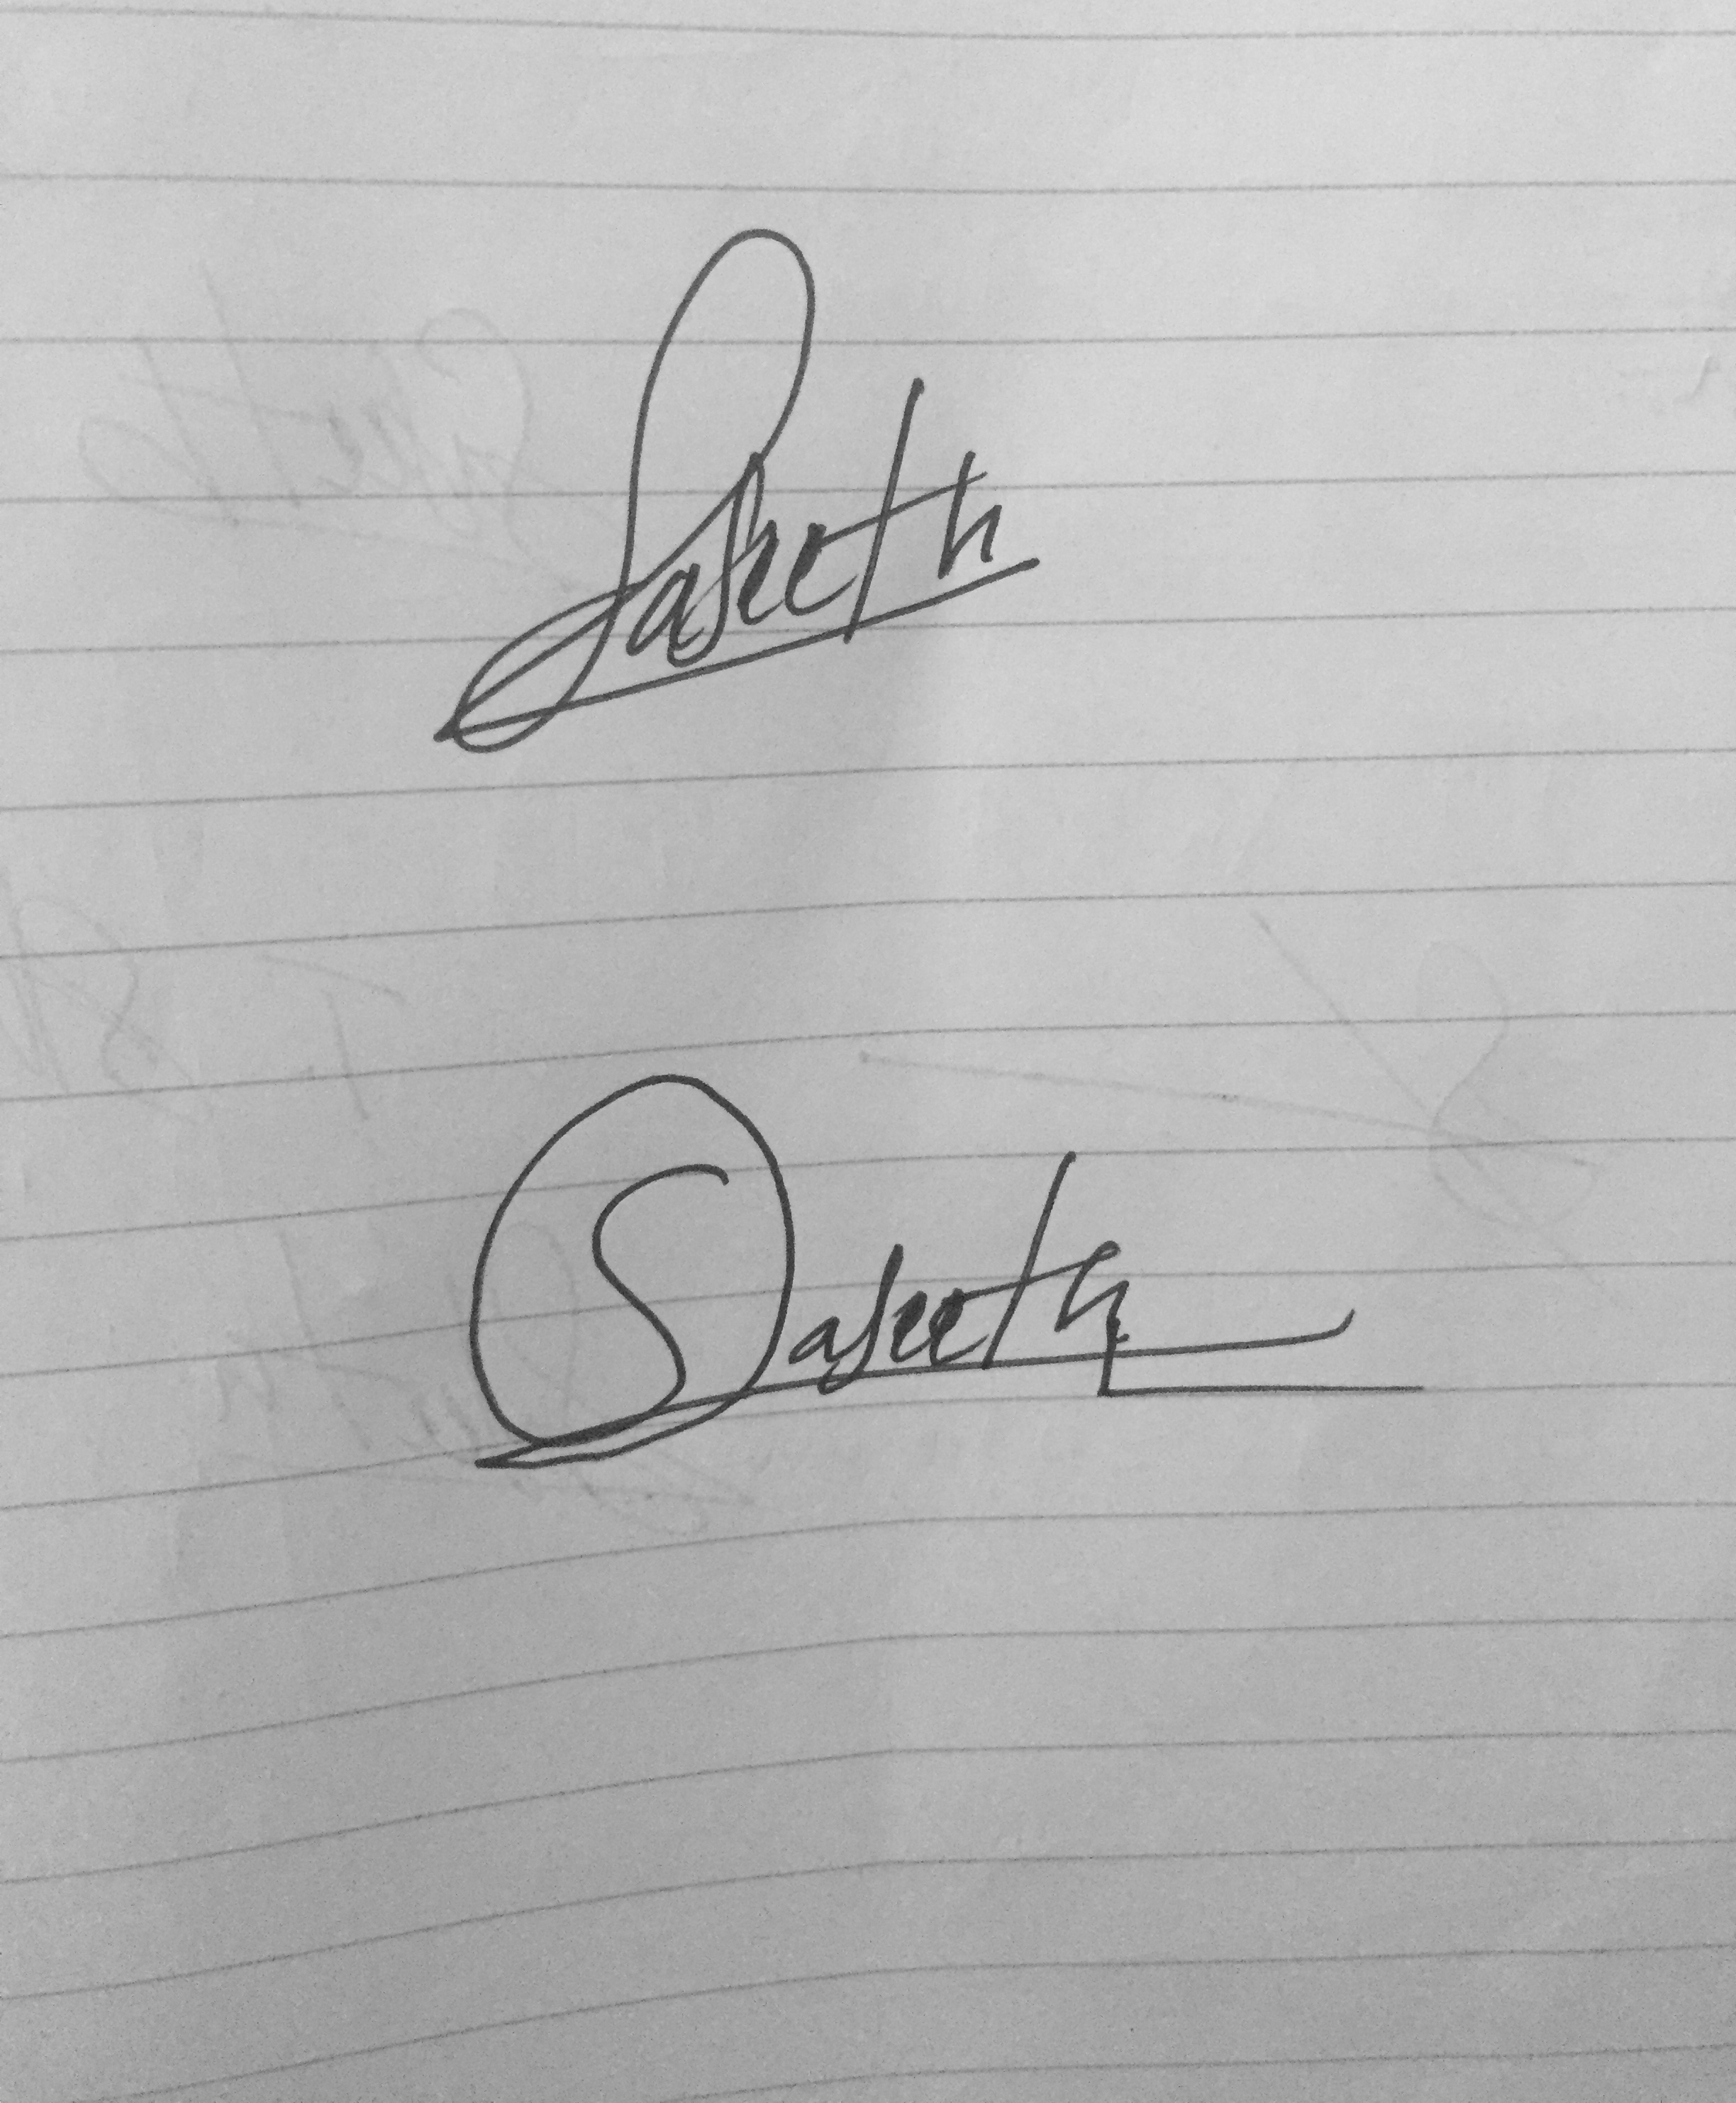

Signature 20837 - Width: 10, Height: 10, Area: 5721822.5


Signature 22060 - Width: 10, Height: 10, Area: 1462.0


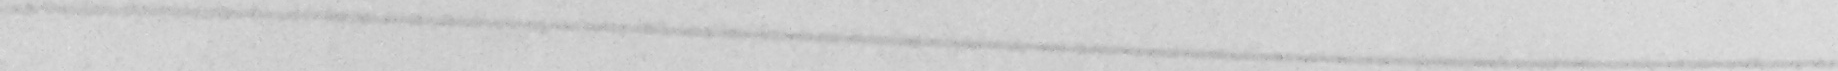

Signature 22369 - Width: 10, Height: 10, Area: 16230.0


In [17]:
import cv2
import os
import numpy as np

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Abi.JPG', cv2.IMREAD_GRAYSCALE)

# Adjust thresholding parameters
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours on the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Set a minimum contour area to filter out small contours
min_contour_area = 1000

# Create a folder for saving signatures
output_folder = '/content/drive/MyDrive/SMiniproject'
os.makedirs(output_folder, exist_ok=True)

# Iterate through each contour
for i, contour in enumerate(contours):
    # Filter out small contours
    if cv2.contourArea(contour) > min_contour_area:
        # Extract the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the signature region from the original grayscale image
        signature = image[y:y + h, x:x + w]

        # Display or save each signature as a separate image
        cv2_imshow(signature)

        # Display signature size information
        print(f'Signature {i + 1} - Width: {10}, Height: {10}, Area: {cv2.contourArea(contour)}')

        # Save the signature as a separate image in the output folder
        signature_path = os.path.join(output_folder, f'Signature_{i + 1}.png')
        cv2.imwrite(signature_path, signature)

        cv2.waitKey(0)

cv2.destroyAllWindows()